# ERIKS Digital - Project Visualisation
A request was put out for anyone who was able to produce the below 2d visualisation, post a sketch. 
I decided to answer the request, and produced the below script. 

# Imports

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from adjustText import adjust_text

In [4]:
def import_and_clean_projects_data(filepath):
    df = pd.read_csv(filepath, encoding = 'utf-8')
    df.Where_to_play = df.Where_to_play.astype(int) 
    df.How_to_win = df.How_to_win.astype(int) 
    return df

In [6]:
df_projects = import_and_clean_projects_data(r"Eric_Viz_Data.csv") # Place data in same folder as notebook

In [7]:
df_projects.head()

,Project_Title,Where_to_play,How_to_win
0,ML optimization analysis on CRA,7,2
1,Algorithm to predict incoming lines in warehouse,3,0
2,Image recognition te identify products at good...,0,5
3,Algorithm to predict and clean delivery times ...,4,9
4,chatbot for easy recurrent questions,1,4


# Initial Visualisation

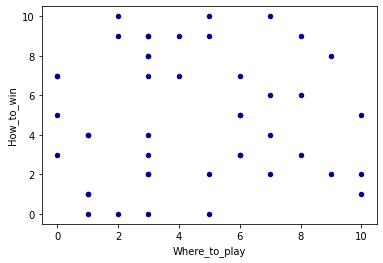

In [8]:
ax1 = df_projects.plot.scatter(x='Where_to_play',
                      y='How_to_win',
                      c='DarkBlue')

# Jitter and add index

In [9]:
df_projects = df_projects.set_index("Project_Title")

In [10]:
def jitter_data(df, dim_1, dim_2):
    dim_1_range = df[dim_1].max() - df[dim_1].min()
    dim_2_range = df[dim_2].max() - df[dim_2].min()
    
jitter_data(df_projects, 'Where_to_play', 'How_to_win')

10
10


In [11]:
df_projects.head()

,Where_to_play,How_to_win
Project_Title,,
ML optimization analysis on CRA,7,2
Algorithm to predict incoming lines in warehouse,3,0
Image recognition te identify products at good reception,0,5
Algorithm to predict and clean delivery times of products,4,9
chatbot for easy recurrent questions,1,4


# Produce visualisation

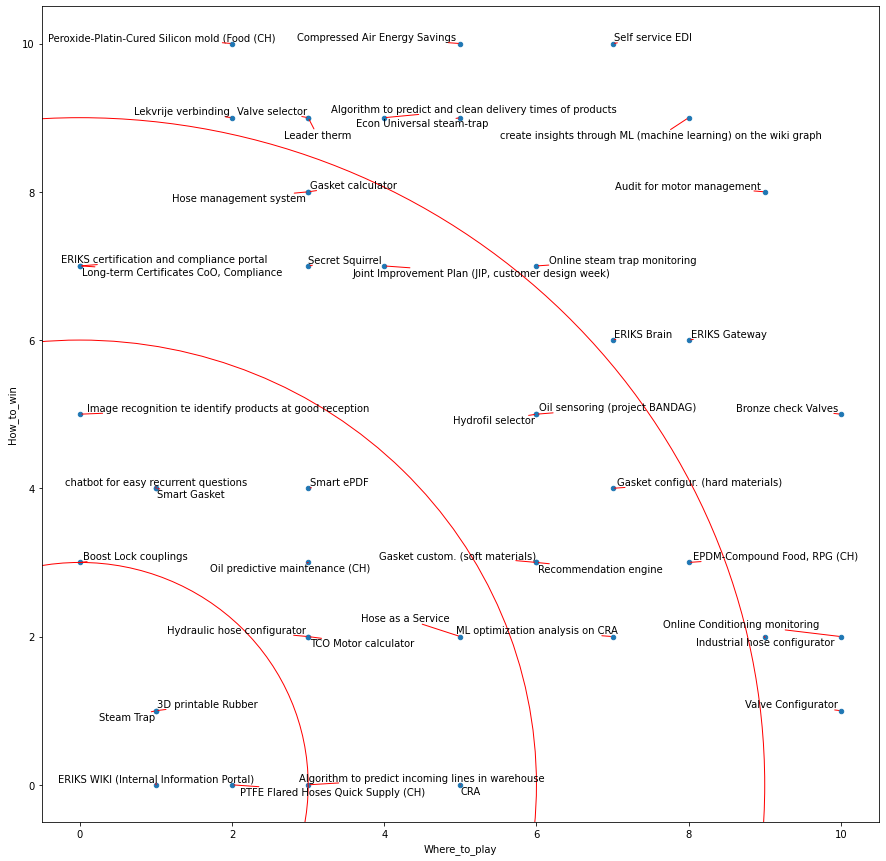

In [12]:
fig, ax = plt.subplots(figsize = (15,15))
df_projects.plot('Where_to_play', 'How_to_win', kind='scatter', ax=ax)

for k, v in df_projects.iterrows():
    dim_1_range = df_projects['Where_to_play'].max() - df_projects['Where_to_play'].min()
    dim_2_range = df_projects['How_to_win'].max() - df_projects['How_to_win'].min()
fig.canvas.draw()

texts = [plt.text(df_projects.Where_to_play[i], df_projects.How_to_win[i], i) for i in df_projects.index]
adjust_text(texts, arrowprops=dict(arrowstyle='-',color='red'))

circle1 = plt.Circle((0, 0), 3, color='r', fill = False)
circle2 = plt.Circle((0, 0), 6, color='r', fill = False)
circle3 = plt.Circle((0, 0), 9, color='r', fill = False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
